In [1]:
import pickle
import os
import pandas as pd
import numpy as np
import json

# YouTube

In [2]:
data_folder = "./data/comments/"

In [3]:
creators = ["unclimatechange", "bbcnews", "climateadam", "drgilbz", "dwplaneta", "extinctionrebellionxr", "greenpeace_international", 
            "guardian", "ourchangingclimate", "ted", "juststopoil", "minuteearth", "metoffices", "zahrabiabani", "rupertread", 
            "friendsoftheearth", "parleychannel", "actionfortheclimate", "piqueaction", "margreen", "nowthisearth"]


In [4]:
all_n_comments = []
all_n_tokens = []
for creator in creators:
    print(creator)
    comments = []
    # open yt comments json file
    with open(data_folder+creator+'_comments_2021-2023.json', 'r') as f:
        yt_comments = json.load(f)

    for comment in yt_comments:
        n_comments_video = len(comment["Comments"])
        # n. tokens per comment in the video
        n_tokens = [len(c[1].split()) for c in comment["Comments"]]
        all_n_comments.append(n_comments_video)
        all_n_tokens.append(n_tokens)

# flatten list of lists
all_n_tokens = [item for sublist in all_n_tokens for item in sublist]

# average n. comments per video
print("Average n. comments per video:", np.mean(all_n_comments))
# average n. tokens per comment
print("Average n. tokens per comment", np.mean(all_n_tokens))


unclimatechange
bbcnews
climateadam
drgilbz
dwplaneta
extinctionrebellionxr
greenpeace_international
guardian
ourchangingclimate
ted
juststopoil
minuteearth
metoffices
zahrabiabani
rupertread
friendsoftheearth
parleychannel
actionfortheclimate
piqueaction
margreen
nowthisearth
Average n. comments per video: 114.97620158656089
Average n. tokens per comment 29.18826351291022


Distributions

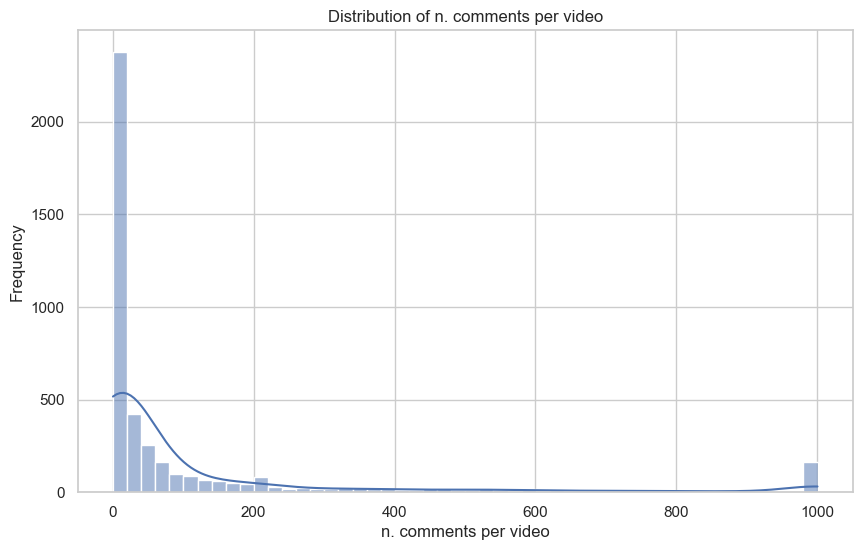

In [5]:
# distribution of n. comments per video
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(all_n_comments, bins=50, kde=True)
plt.xlabel('n. comments per video')
plt.ylabel('Frequency')
plt.title('Distribution of n. comments per video')
plt.show()

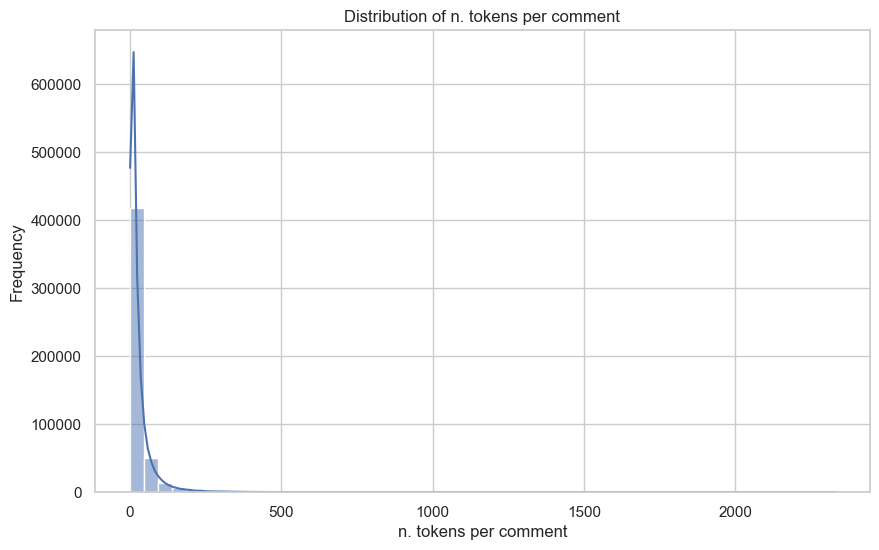

In [6]:
# distribution of n. tokens per comment
plt.figure(figsize=(10, 6))
sns.histplot(all_n_tokens, bins=50, kde=True)
plt.xlabel('n. tokens per comment')
plt.ylabel('Frequency')
plt.title('Distribution of n. tokens per comment')
plt.show()


In [7]:
# quantiles of n. comments per video
print("Quantiles of n. comments per video")
print(np.quantile(all_n_comments, [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

Quantiles of n. comments per video
[   2.    15.    81.   383.   773.5 1001. ]


In [8]:
# quantiles of n. tokens per comment
print("Quantiles of n. tokens per comment")
print(np.quantile(all_n_tokens, [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

Quantiles of n. tokens per comment
[  7.  15.  32.  64.  98. 221.]


# TikTok

In [9]:
data_folder = "../tiktok-opinion-dynamics/src/tiktok_opinion_dynamics/data/comments/creators/"

In [10]:
creators = ["unclimatechange", "bbcnews", "climateadam", "drgilbz", "dwplaneta", "extinctionrebellionxr", "greenpeace_international", 
            "guardian", "ourchangingclimate", "ted", "juststopoil", "minuteearth", "metoffices", "zahrabiabani", "rupertread", 
            "friendsoftheearth", "parleychannel", "actionfortheclimate", "piqueaction", "margreen", "nowthisearth"]


In [11]:
all_n_comments_tt = []
all_n_tokens_tt = []
for creator in creators:
    print(creator)
    comments = []
    # open yt comments json file
    with open(data_folder+'all_comments_'+creator+'.json', 'r') as f:
        tt_comments = json.load(f)

    dict_videos = {}
    for comment in tt_comments:
        if comment["video_id"] not in dict_videos:
            dict_videos[comment["video_id"]] = 1
        else:
            dict_videos[comment["video_id"]] += 1
        
    
        n_tokens = len(comment["text"].split())
        all_n_tokens_tt.append(n_tokens) 
        

    for video in dict_videos:
        n_comments_video = dict_videos[video]

        all_n_comments_tt.append(n_comments_video)
        

# average n. comments per video
print("Average n. comments per video:", np.mean(all_n_comments_tt))
# average n. tokens per comment
print("Average n. tokens per comment", np.mean(all_n_tokens_tt))


unclimatechange
bbcnews
climateadam
drgilbz
dwplaneta
extinctionrebellionxr
greenpeace_international
guardian
ourchangingclimate
ted
juststopoil
minuteearth
metoffices
zahrabiabani
rupertread
friendsoftheearth
parleychannel
actionfortheclimate
piqueaction
margreen
nowthisearth
Average n. comments per video: 37.91743970315399
Average n. tokens per comment 9.150470948012233


Distributions

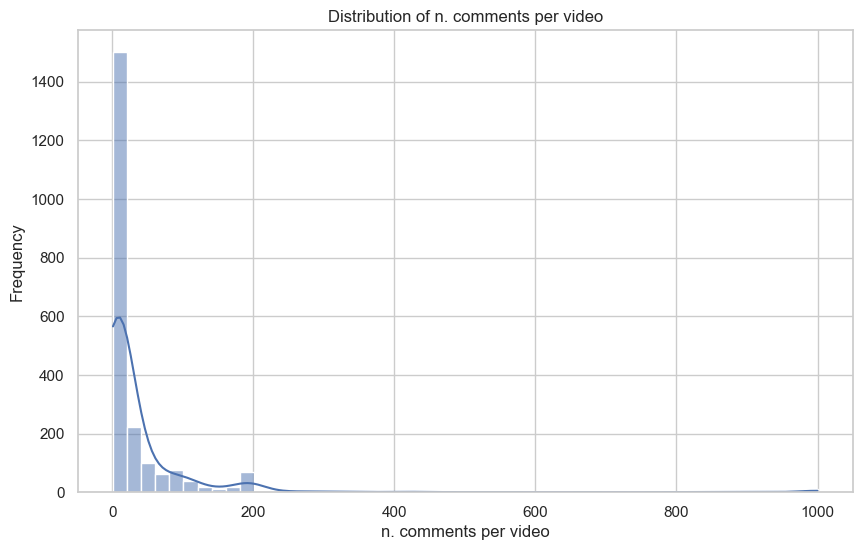

In [12]:
# distribution of n. comments per video
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(all_n_comments_tt, bins=50, kde=True)
plt.xlabel('n. comments per video')
plt.ylabel('Frequency')
plt.title('Distribution of n. comments per video')
plt.show()

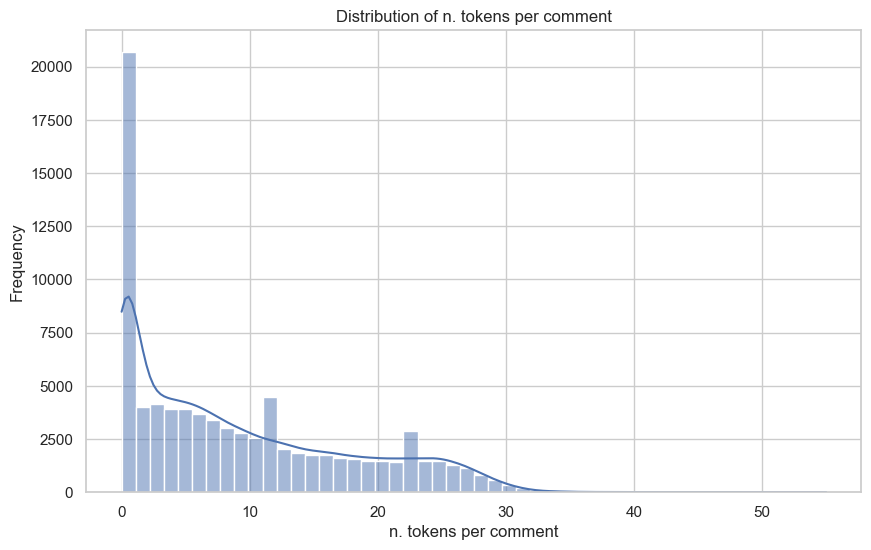

In [13]:
# distribution of n. tokens per comment
plt.figure(figsize=(10, 6))
sns.histplot(all_n_tokens_tt, bins=50, kde=True)
plt.xlabel('n. tokens per comment')
plt.ylabel('Frequency')
plt.title('Distribution of n. tokens per comment')
plt.show()


In [14]:
# quantiles of n. comments per video
print("Quantiles of n. comments per video")
print(np.quantile(all_n_comments_tt, [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

Quantiles of n. comments per video
[  3.     9.    29.   100.   185.25 409.9 ]


In [15]:
# quantiles of n. tokens per comment
print("Quantiles of n. tokens per comment")
print(np.quantile(all_n_tokens_tt, [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

Quantiles of n. tokens per comment
[ 1.  7. 15. 23. 26. 29.]


# Compare plots

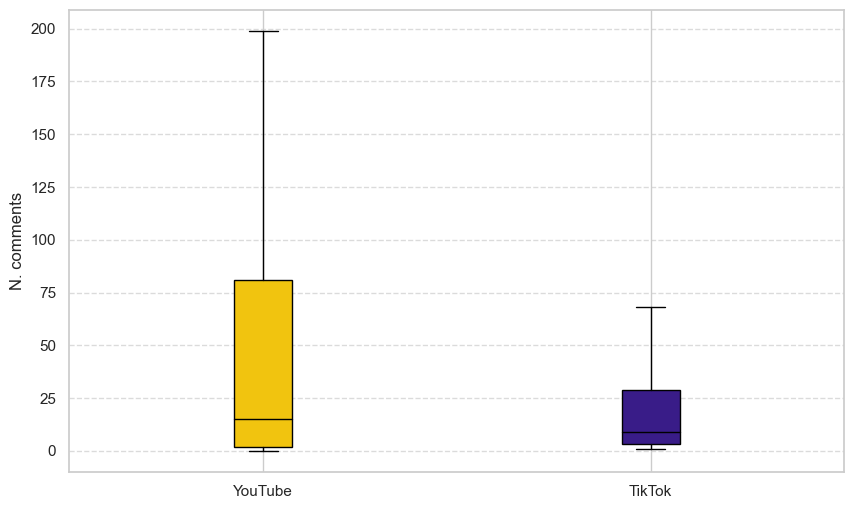

In [30]:
# boxplots for all_n_comments, all_n_comments_tt, all_n_tokens, all_n_tokens_tt

# Combine the data into a list of lists
data = [all_n_comments, all_n_comments_tt]

# Adjusting colors for YouTube (yellow) and TikTok (dark purple)
colors = ['#F1C40F', '#391C88']  # Yellow for YouTube, Dark Purple for TikTok

# Create the boxplot with customized colors
plt.figure(figsize=(10, 6))
bp = plt.boxplot(data, patch_artist=True, showfliers=False, medianprops=dict(color="black"))

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Customizing the plot
plt.xticks([1, 2], ['YouTube', 'TikTok'])
plt.ylabel('N. comments')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


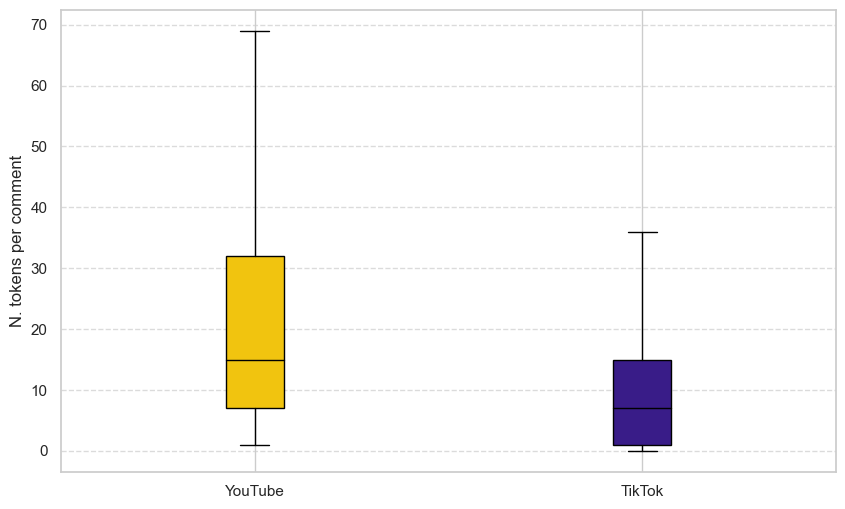

In [28]:

# Combine the data into a list of lists
data = [all_n_tokens, all_n_tokens_tt]

# Adjusting colors for YouTube (yellow) and TikTok (dark purple)
colors = ['#F1C40F', '#391C88']  # Yellow for YouTube, Dark Purple for TikTok

# Create the boxplot with customized colors
plt.figure(figsize=(10, 6))
bp = plt.boxplot(data, patch_artist=True, showfliers=False, medianprops=dict(color="black"))

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Customizing the plot
plt.xticks([1, 2], ['YouTube', 'TikTok'])
plt.ylabel('N. tokens per comment')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()